In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_heart = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/heart.csv")
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df_heart['Sex1'] = df_heart.sex.replace({1: "pria", 0: "wanita"})
dx = df_heart[["chol", "Sex1"]].dropna()
dx

,chol,Sex1
0,212,pria
1,203,pria
2,174,pria
3,203,pria
4,294,wanita
...,...,...
1020,221,pria
1021,258,pria
1022,275,pria
1023,254,wanita


In [ ]:
pd.crosstab(dx.chol, dx.Sex1)

Sex1,pria,wanita
chol,,
126,3,0
131,3,0
141,0,3
149,4,4
157,4,0
...,...,...
394,0,3
407,0,4
409,0,3


In [ ]:
df_heart.groupby("Sex1").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
pria    239.237027  43.155535  713
wanita  261.455128  64.466781  312

In [ ]:
mean_wanita = 261.455128
sd_wanita = 64.466781
n_wanita = 312
mean_pria = 239.237027
sd_pria = 43.155535
n_pria = 713
z = 1.96

se_wanita = sd_wanita / np.sqrt(n_wanita)
se_wanita

3.649712779576458

In [ ]:
lcb_wanita = mean_wanita - z* se_wanita
ucb_wanita = mean_wanita + z* se_wanita
lcb_wanita, ucb_wanita

(254.30169095203016, 268.6085650479699)

Berarti confidence interval kolesterol pada wanita berada di antara 254.301 dan 268.608

In [ ]:
se_pria = sd_pria / np.sqrt(n_pria)
se_pria

1.6161874870133217

In [ ]:
lcb_pria = mean_pria - z* se_pria
ucb_pria = mean_pria + z* se_pria
lcb_pria, ucb_pria

(236.0692995254539, 242.4047544745461)

Sedangkan pada pria, confidence interval kolesterolnya berada di antara 236.069 dan 242.404

In [ ]:
df_heart['Sex1'] = df_heart.sex.replace({"pria": 1, "wanita": 0})
dk = df_heart[["chol", "Sex1"]].dropna()
dk

,chol,Sex1
0,212,1
1,203,1
2,174,1
3,203,1
4,294,0
...,...,...
1020,221,1
1021,258,1
1022,275,1
1023,254,0


In [ ]:
np.histogram(dk)

(array([1025,    0,   42,  332,  414,  200,   24,   10,    0,    3]),
 array([  0. ,  56.4, 112.8, 169.2, 225.6, 282. , 338.4, 394.8, 451.2,
        507.6, 564. ]))

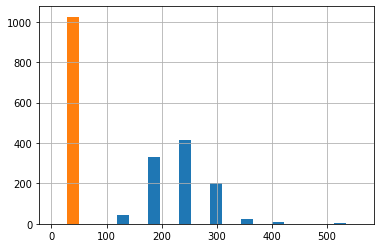

In [ ]:
pd.Series.hist(dk)